# Ejercicios Pair Programming - Modulo 2 - Sprint 1 
## Lección 7 - Visualización III: Seaborn
### Judith Mellidez y Sonia Ruiz

En este ejercicio, de nuevo, trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas V, ese en el que habíamos unido distintos csv en uno.

En estos ejercicios aprenderemos a hacer algunas gráficas usando la librería seaborn. Igual que el ejercicio anterior de pair programming, para solucionar algunas preguntas tendréis que usar métodos y herramientas aprendidas anteriormente como groupby, value_counts, rename, filtrado de datos, etc.

📌 NOTA Somos analistas y no nos vale con sacar las gráficas. Incluid una celda de markdown donde expliqueis que es lo que estamos viendo en las gráficas, es decir, haced una interpretación de los resultados.

1. Usando la librería seaborn, crea una gráfica de barras que muestre el número de personas que han hecho cada actividad en cada año. Hacedlo solo desde el 2015. Os podrá salir una gráfica un poco fea, no os preocupeis, es lo que esperamos.

In [1]:
#Importamos las librerias necesarias para poder trabajar con los datos.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Creamos el DataFrame con los datos del .csv de la leccion Pandas V.
df=pd.read_csv('../pandas/Data_lecc5_pandas/attacks_lec5.csv')
df.head()

,Unnamed: 0,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo,fatal_(y/n),injury,date
0,0,2018.06.25,0.0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,1,2018.06.03.a,6.0,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,Y,FATAL,03-Jun-2018
2,2,2018.05.26.b,8.0,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,17h00,"Bull shark, 6'",http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Lower left leg bitten,26-May-2018
3,3,2018.05.24,10.0,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Morning,Grey reef shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Minor bite to hand by captive shark. PROVOKED ...,24-May-2018
4,4,2018.05.13.a,13.0,2018.0,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,21,08h15,Invalid incident,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Injured by teeth of a dead porbeagle shark he ...,13-May-2018


In [6]:
#Realizamos un analisis previo de este DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1672 non-null   int64  
 1   case_number  1672 non-null   object 
 2   unnamed:_0   1502 non-null   float64
 3   year         1672 non-null   float64
 4   type         1672 non-null   object 
 5   country      1662 non-null   object 
 6   area         1626 non-null   object 
 7   location     1621 non-null   object 
 8   activity     1641 non-null   object 
 9   name         1663 non-null   object 
 10  sex_         1658 non-null   object 
 11  age          1518 non-null   object 
 12  time         1512 non-null   object 
 13  species_     1546 non-null   object 
 14  href         1672 non-null   object 
 15  siglo        1502 non-null   object 
 16  fatal_(y/n)  1585 non-null   object 
 17  injury       1664 non-null   object 
 18  date         1672 non-null   object 
dtypes: flo

In [7]:
#Observamos el nombre de las columnas.
df.columns

Index(['Unnamed: 0', 'case_number', 'unnamed:_0', 'year', 'type', 'country',
       'area', 'location', 'activity', 'name', 'sex_', 'age', 'time',
       'species_', 'href', 'siglo', 'fatal_(y/n)', 'injury', 'date'],
      dtype='object')

In [8]:
#Obtenemos los principales analsis estadisticos de los datos numéricos de nuestro DataFrame.
df.describe()

,Unnamed: 0,unnamed:_0,year
count,1672.000000,1502.000000,1672.000000
mean,835.500000,2169.600533,1832.688397
std,482.809141,1336.383393,528.969901
min,0.000000,0.000000,0.000000
25%,417.750000,1096.250000,1964.000000
50%,835.500000,1972.000000,1997.000000
75%,1253.250000,3112.000000,2008.000000
max,1671.000000,5922.000000,2018.000000


In [24]:
#Creamos un DataFrame para obtener la informacion de las actividades por persona a partir de 2015.
df_act_2015=df[df['year']>=2015]
df_act_2015.head(100)

,Unnamed: 0,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo,fatal_(y/n),injury,date
0,0,2018.06.25,0.0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,1,2018.06.03.a,6.0,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,Y,FATAL,03-Jun-2018
2,2,2018.05.26.b,8.0,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,17h00,"Bull shark, 6'",http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Lower left leg bitten,26-May-2018
3,3,2018.05.24,10.0,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Morning,Grey reef shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Minor bite to hand by captive shark. PROVOKED ...,24-May-2018
4,4,2018.05.13.a,13.0,2018.0,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,21,08h15,Invalid incident,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Injured by teeth of a dead porbeagle shark he ...,13-May-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2015.10.09.a,348.0,2015.0,Unprovoked,USA,Hawaii,"Leftovers, Oahu",Surfing,Colin Cook,M,25,10h25,"Tiger shark, 13'",http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,"Left leg severed below the knee, defense injur...",09-Oct-2015
96,96,2015.10.05.a,352.0,2015.0,Unprovoked,USA,Texas,Galveston,Wading,Gregory Slaughter,M,13,10h00,4' to 5' shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Foot & hands bitten,05-Oct-2015
97,97,2015.10.04,353.0,2015.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Phillip Tarasovic,M,14,08h30,"Blacktip shark, 4' to 5'",http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Severe lacerations to left hand,04-Oct-2015
98,98,2015.09.29,354.0,2015.0,Unprovoked,USA,Florida,"Vilano Beach, St. Johns County",Surfing,"David Morrison, Jr.",M,22,16h20,"Blacktip shark, 5' to 6'",http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,"Laceration to heel, puncture wounds to dorsum ...",29-Sep-2015


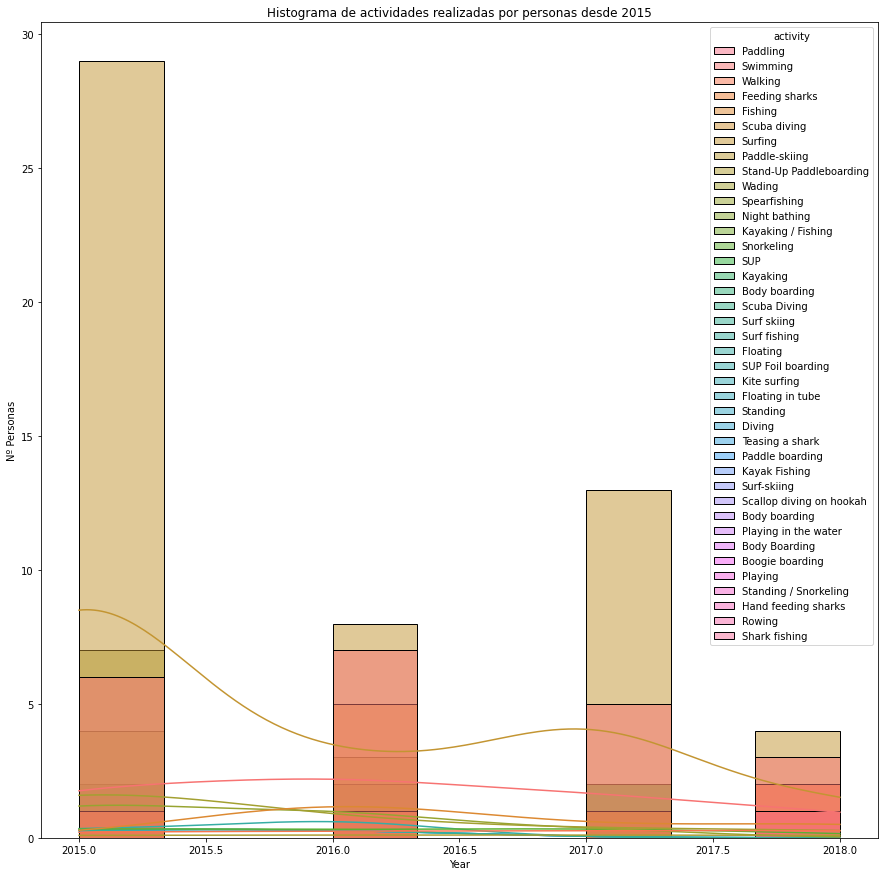

In [18]:
#Creamos un histograma para representar las actividades por persona desde 2015. Le damos esa dimension para
#  que la leyenda no superponga a las barras
plt.figure(figsize=(15,15))
fig=sns.histplot(x='year',data=df_act_2015,hue='activity',kde=True)
#Ponemos el kde para mostrar la densidad de la probabilidad a través de la línea de tendencia.
fig.set(xlabel='Year',ylabel='Nº Personas')
fig.set_title('Histograma de actividades realizadas por personas desde 2015')
plt.show()

    - Debido al gran numero de categorias es dificil discernir con claridad a que categoria corresponde cada color.

2. Usando la librería seaborn, crea una gráfica de barras que muestre el número de ataques que han ocurrido cada año en función del sexo. Hacedlo solo desde el 2015.

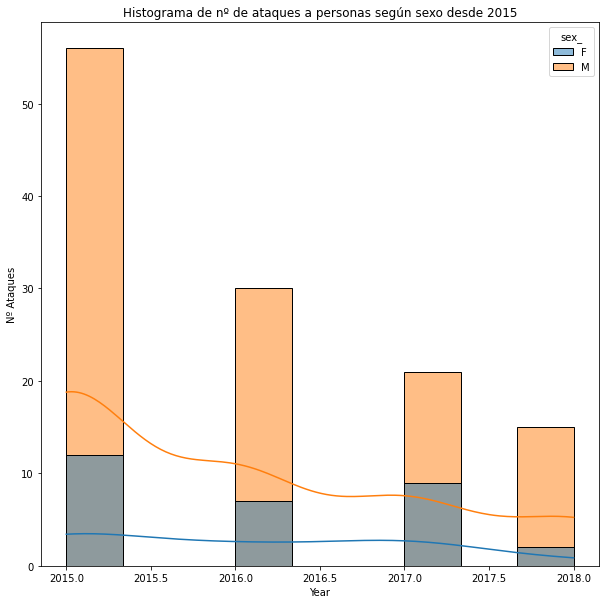

In [20]:
#Creamos un histograma para representar los ataques por persona desde 2015.
plt.figure(figsize=(10,10))
fig=sns.histplot(x='year',data=df_act_2015,hue='sex_',kde=True)
#Ponemos el kde para mostrar la densidad de la probabilidad a través de la línea de tendencia.
fig.set(xlabel='Year',ylabel='Nº Ataques')
fig.set_title('Histograma de nº de ataques a personas según sexo desde 2015')
plt.show()

    - Podemos observar que la categoria M presento un mayor numero de ataques, especialmente en el año 2015. Ademas, los ataques de M fueron disminuyendo hacia el año 2018 a menos de la mitad.

3. ¿Cuántos ataques hubo por año? Seleccionad solo desde el año 1500.

In [23]:
#Creamos un DataFrame para obtener la informacion de las actividades por persona a partir de 1500.
df_act_1500=df[df['year']>=1500]
df_act_1500.head()

,Unnamed: 0,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo,fatal_(y/n),injury,date
0,0,2018.06.25,0.0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,1,2018.06.03.a,6.0,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,Y,FATAL,03-Jun-2018
2,2,2018.05.26.b,8.0,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,17h00,"Bull shark, 6'",http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Lower left leg bitten,26-May-2018
3,3,2018.05.24,10.0,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Morning,Grey reef shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Minor bite to hand by captive shark. PROVOKED ...,24-May-2018
4,4,2018.05.13.a,13.0,2018.0,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,21,08h15,Invalid incident,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Injured by teeth of a dead porbeagle shark he ...,13-May-2018


In [32]:
df_act_1500_shape=df_act_1500.shape
print('El DataFrame df_act_1500 tiene',df_act_1500_shape[0],'filas y',df_act_1500_shape[1],'columnas')
print('El numero de ataques desde 1500 son:',df_act_1500_shape[0])

El DataFrame df_act_1500 tiene 1544 filas y 19 columnas
El numero de ataques desde 1500 son: 1544


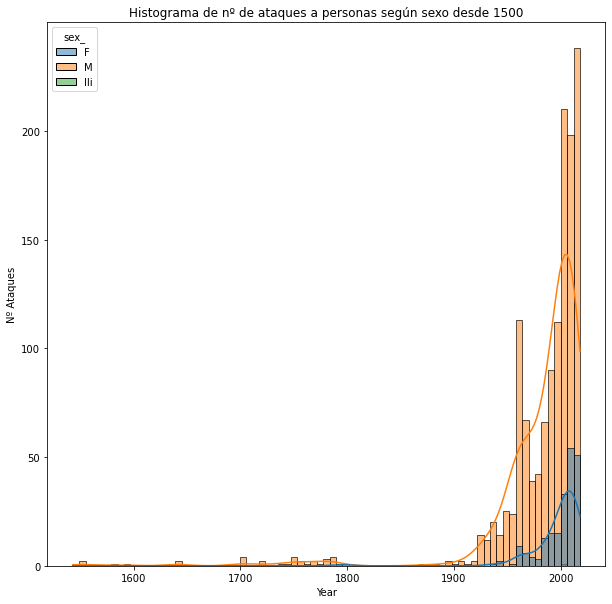

In [33]:
#No nos solicita la creacion del histograma, pero hemos querido representarlo para verlo gráficamente.
plt.figure(figsize=(10,10))
fig=sns.histplot(x='year',data=df_act_1500,hue='sex_',kde=True)
#Ponemos el kde para mostrar la densidad de la probabilidad a través de la línea de tendencia.
fig.set(xlabel='Year',ylabel='Nº Ataques')
fig.set_title('Histograma de nº de ataques a personas según sexo desde 1500')
plt.show()

    - Se observa que el numero de ataques aumenta a partir del año 1900. Esto no quiere decir que los ataques de tiburones a personas haya aumentado considerabemtne, sino que tenemos más registros a partir de ese año. Una posible causa es que cada vez se ha ido dando más importancia a almacenar la información de los ataques de tiburones a personas y dicha información no se ha perdido.

4. Seleccionad solo los registros de USA, AUSTRALIA y SOUTH AFRICA. Muestra el número de ataques por país y año desde el año 1900.

In [71]:
#Una forma de extraer los datos que nos piden es de la siguiente manera, donde si toma los valores nulos.
df_1900_U_A_S=df[(df['year']>=1900)&(df['country']=='USA')|(df['country']=='AUSTRALIA')|(df['country']=='SOUTH AFRICA')]
df_1900_U_A_S.isnull().sum()

Unnamed: 0      0
case_number     0
unnamed:_0     27
year            0
type            0
country         0
area            5
location        8
activity        5
name            0
sex_            1
age            26
time           27
species_       21
href            0
siglo          27
fatal_(y/n)    72
injury          1
date            0
dtype: int64

In [48]:
#Otra forma de extraer los datos que nos piden es la siguiente, donde no toma los valores nulos.
df_USA_AUS_SA=df[df['country'].isin(['USA','AUSTRALIA','SOUTH AFRICA'])&(df['year']>=1900)]
df_USA_AUS_SA.isnull().sum()

Unnamed: 0      0
case_number     0
unnamed:_0      0
year            0
type            0
country         0
area            0
location        0
activity        0
name            0
sex_            0
age             0
time            0
species_        0
href            0
siglo           0
fatal_(y/n)    72
injury          0
date            0
dtype: int64

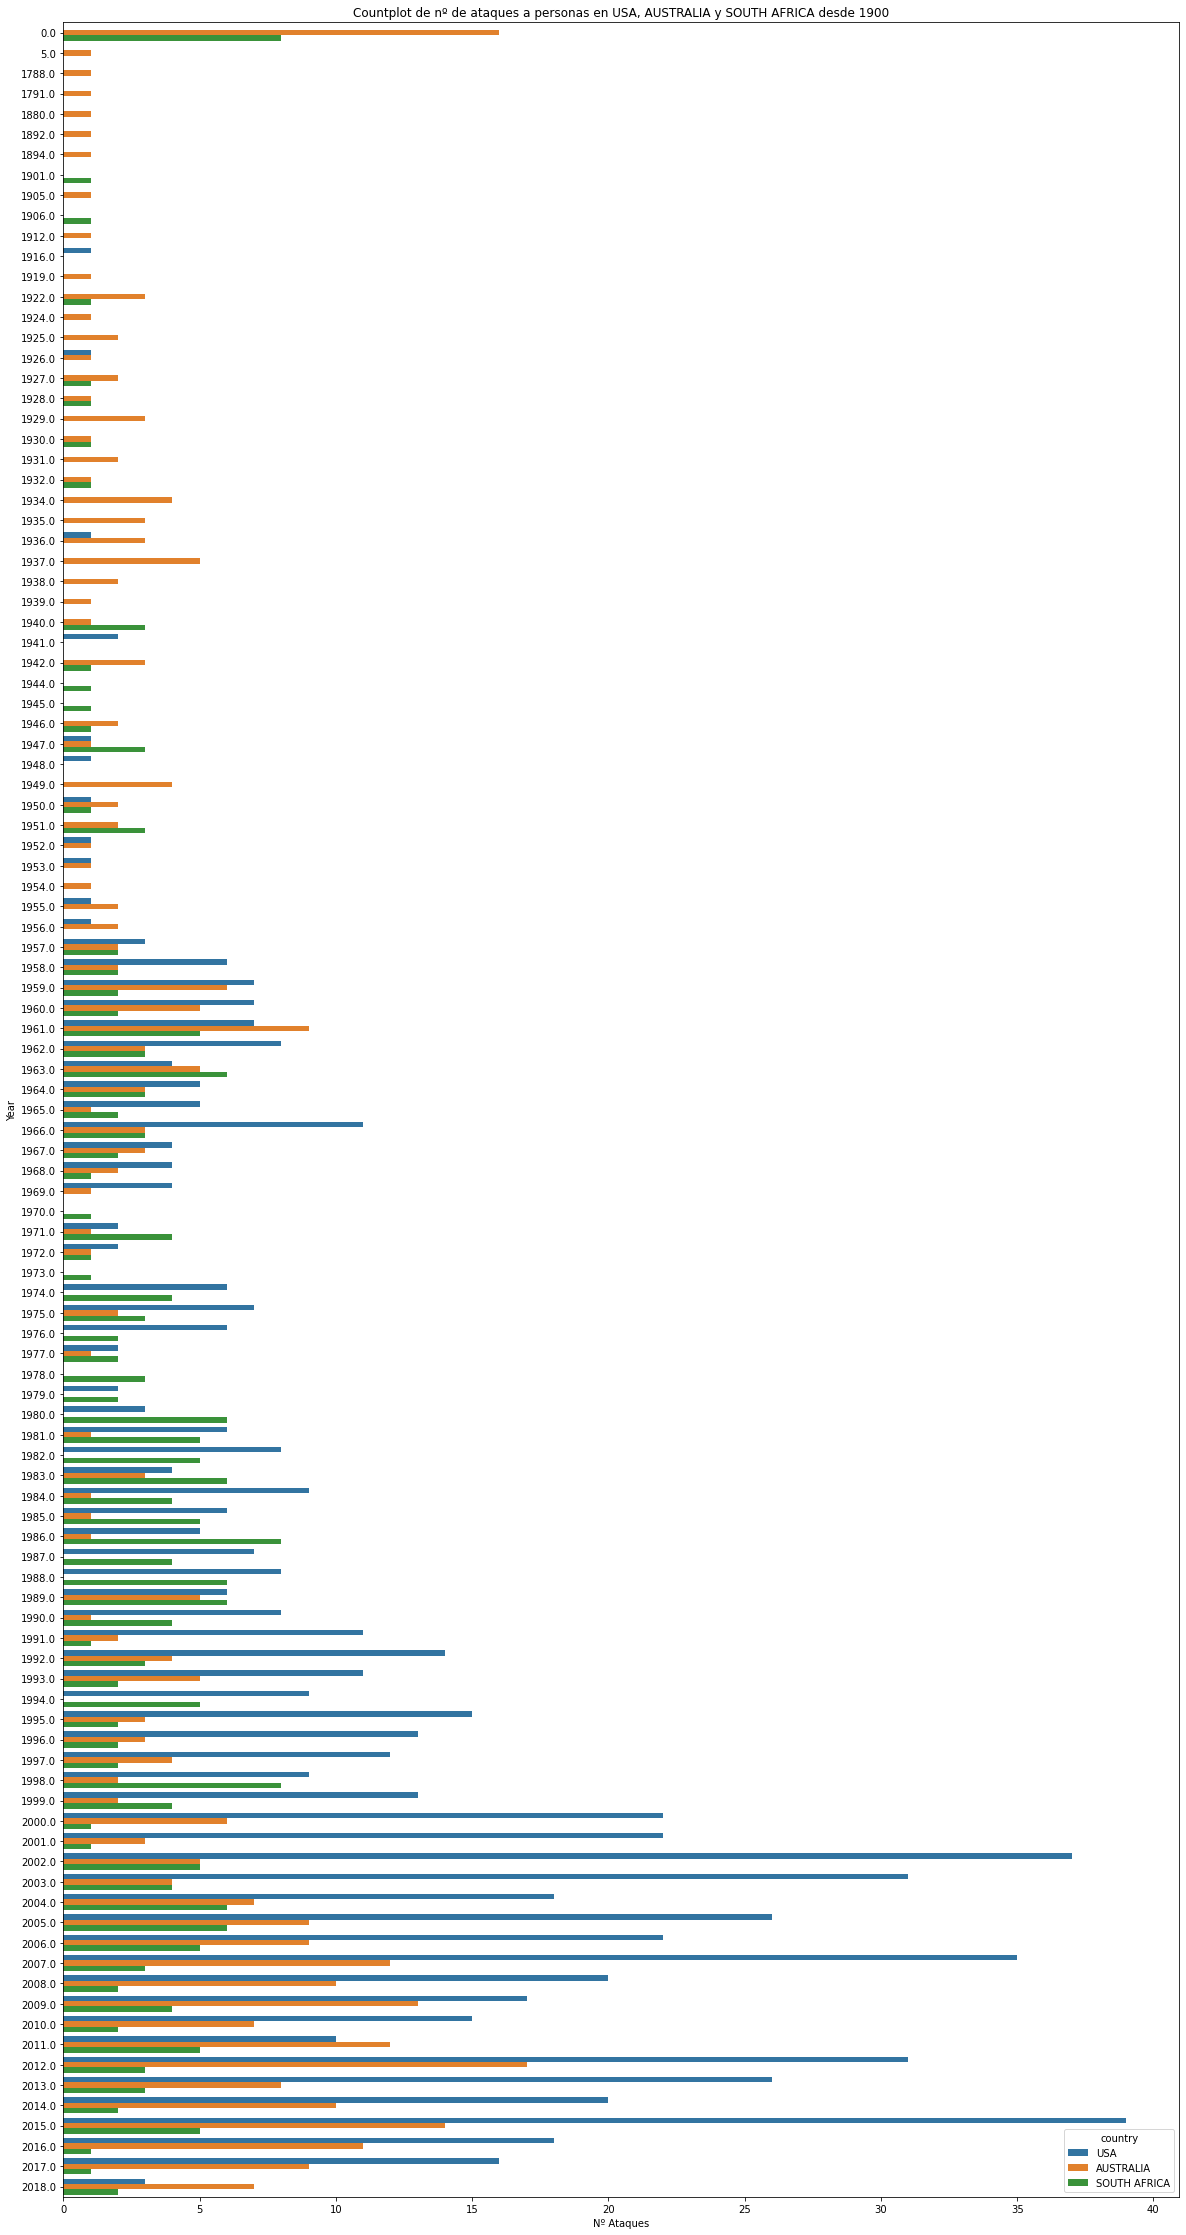

In [59]:
#Realizamos un countplot para el primer metodo (tomando los nulos). Al ser un countplot, realizara
#  un diagrama de barras utilizando la variable "years" como categorica.
plt.figure(figsize=(20,40))
fig=sns.countplot(y='year',data=df_1900_U_A_S, hue='country')
fig.set(xlabel='Nº Ataques',ylabel='Year')
fig.set_title('Countplot de nº de ataques a personas en USA, AUSTRALIA y SOUTH AFRICA desde 1900')
plt.show()

    - Podemos observar que la mayoria de registros para los 3 paises se encuentran a partir de año 2000.

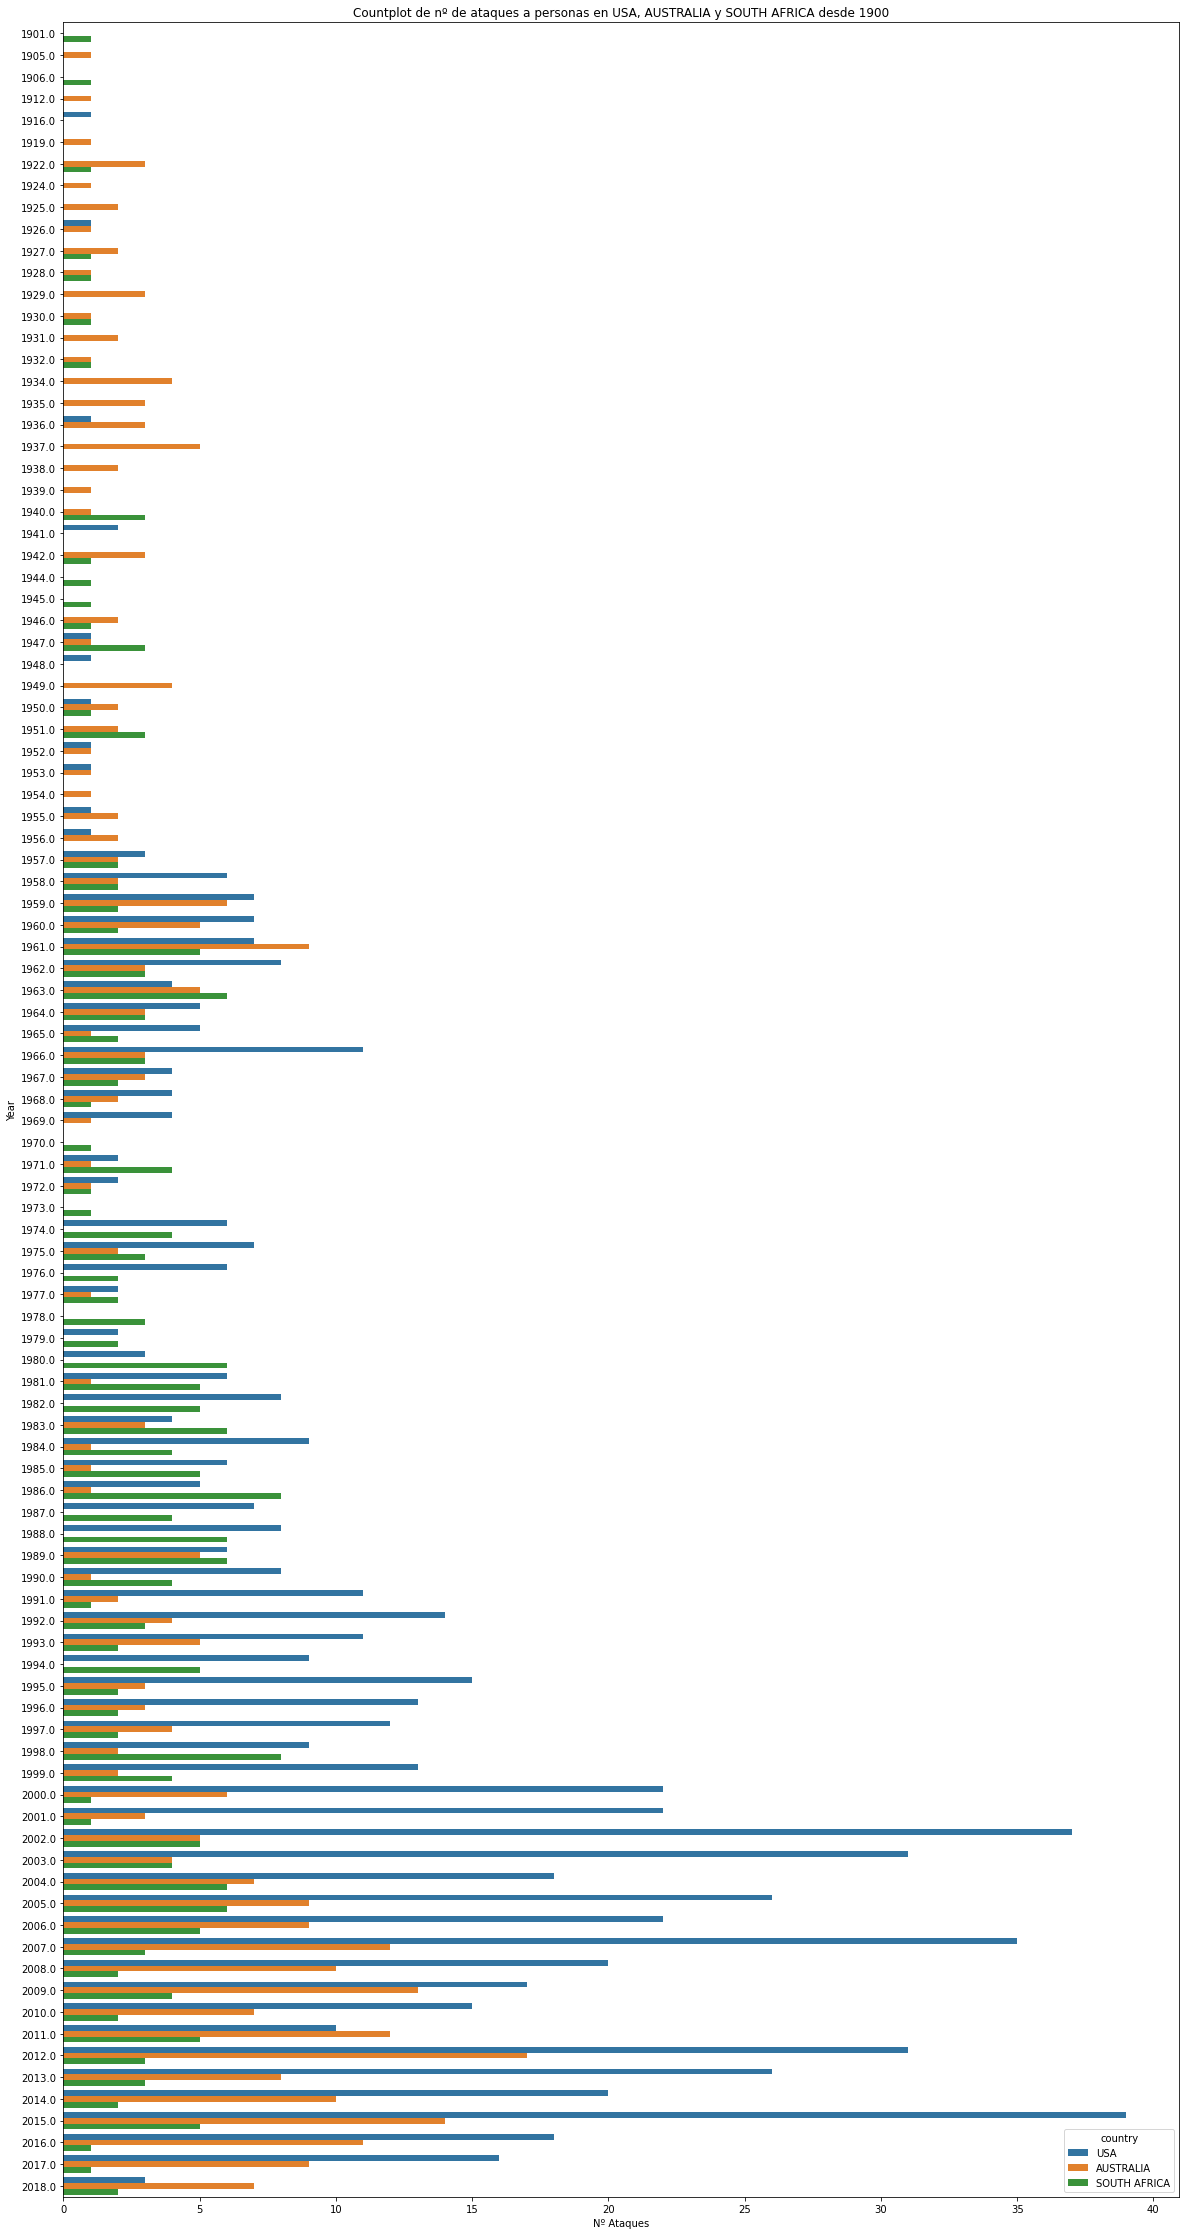

In [60]:
#Realizamos un countplot para el segundo metodo (no tomando los nulos).
plt.figure(figsize=(20,40))
fig=sns.countplot(y='year',data=df_USA_AUS_SA, hue='country')
fig.set(xlabel='Nº Ataques',ylabel='Year')
fig.set_title('Countplot de nº de ataques a personas en USA, AUSTRALIA y SOUTH AFRICA desde 1900')
plt.show()

    - Al no tomar las filas con valores nulos, podemos observar que los datos mantienen distribucion de la grafica anterior.

5. Realizad un boxplot donde se muestre los principales estadísticos del número de ataques por país.

In [3]:
#Creamos un DataFrame con un agrupamiento de datos a partir del DataFrame original, donde agrupamos
#  el número de ataques por pais.
df_groupby=df.groupby('country')['case_number'].count().reset_index(name='numero_ataques')
df_groupby

,country,numero_ataques
0,AMERICAN SAMOA,2
1,ARGENTINA,1
2,ASIA?,1
3,AUSTRALIA,343
4,BAHAMAS,29
...,...,...
90,URUGUAY,2
91,USA,741
92,VANUATU,4
93,VENEZUELA,4


In [129]:
#Ralizamos un analisis de los pricipales estadísticos para el DataFrame que hemos creado con los datos agrupados.
df_groupby.describe()

,numero_ataques
count,95.000000
mean,17.494737
std,86.038818
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,741.000000


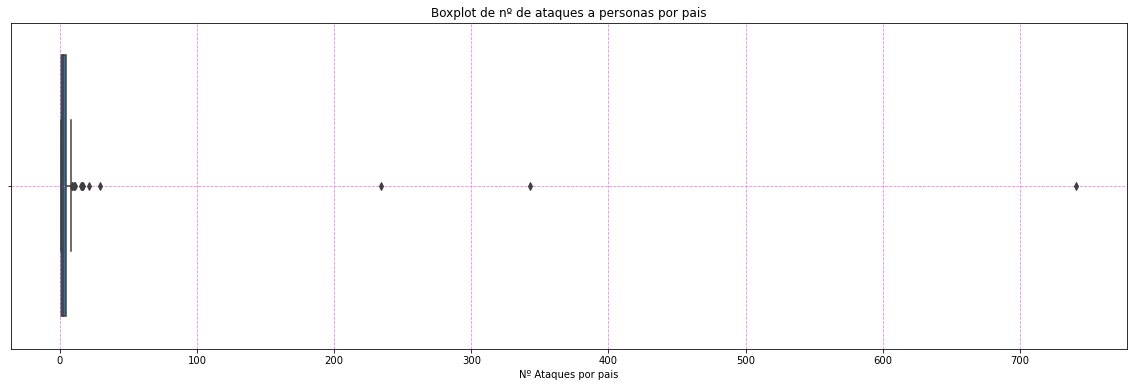

In [9]:
#Realizamos un boxplot con algunos de los estadísticos que se pueden obtener de los ataques por país.
plt.figure(figsize=(20,6))
fig=sns.boxplot(x='numero_ataques',data=df_groupby)
fig.set(xlabel='Nº Ataques por pais')
fig.set_title('Boxplot de nº de ataques a personas por pais')
plt.grid(color='violet',linestyle='--')
plt.show()

    - En este diagrama de cajas (boxplot) se observa que la mayoria de paises presenta un numero de ataques de tiburon inferior a 50 casos, ya que tanto la caja como sus bigotes se encuentran por debajo de este valor, al igual que el rango intercuartilico y el Q2 (mediana). Podemos ver algunos outliers por encima del Q3.

Happy coding 🦈